In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from math import log10, floor
from sklearn.linear_model import LinearRegression

In [109]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [110]:
def data_analysis(df): 
    
    print("-------Dimensões--------")
    print("Linhas:", df.shape[0], "Colunas:", df.shape[1], "\n")
    
    print("-------Tipos--------\n")
    lsTypes= ["bool","float","integer","object","datetime64[ns]"]
    columns = df.columns.tolist()
    columnWithNaN = []
    
    for tp in lsTypes:      
        print(tp, "\n", "variables",len(df.select_dtypes(tp).columns), "\n",df.select_dtypes(tp).columns.tolist(), "\n")

    print("-------Colunas com Dados NaN------- \n")
    
    for column in columns:
        if(df[column].isnull().sum() > 0):
            columnWithNaN.append(column)
    
    print(columnWithNaN, "\n")
    
    

In [111]:
data_analysis(df)


-------Dimensões--------
Linhas: 1000 Colunas: 16 

-------Tipos--------

bool 
 variables 0 
 [] 

float 
 variables 2 
 ['IMDB_Rating', 'Meta_score'] 

integer 
 variables 1 
 ['No_of_Votes'] 

object 
 variables 13 
 ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross'] 

datetime64[ns] 
 variables 0 
 [] 

-------Colunas com Dados NaN------- 

['Certificate', 'Meta_score', 'Gross'] 



In [113]:
names2lower = [nameColumn.lower() for nameColumn in df.columns.tolist()]
df.columns = names2lower
df.head()


,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [112]:
df = df.drop(columns=['Poster_Link','Certificate','Overview'])
df.head()
data_analysis(df)

-------Dimensões--------
Linhas: 1000 Colunas: 13 

-------Tipos--------

bool 
 variables 0 
 [] 

float 
 variables 2 
 ['IMDB_Rating', 'Meta_score'] 

integer 
 variables 1 
 ['No_of_Votes'] 

object 
 variables 10 
 ['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross'] 

datetime64[ns] 
 variables 0 
 [] 

-------Colunas com Dados NaN------- 

['Meta_score', 'Gross'] 



In [114]:
df["gross"] = df["gross"].str.replace(',', '').astype('float')
data_analysis(df)

-------Dimensões--------
Linhas: 1000 Colunas: 13 

-------Tipos--------

bool 
 variables 0 
 [] 

float 
 variables 3 
 ['imdb_rating', 'meta_score', 'gross'] 

integer 
 variables 1 
 ['no_of_votes'] 

object 
 variables 9 
 ['series_title', 'released_year', 'runtime', 'genre', 'director', 'star1', 'star2', 'star3', 'star4'] 

datetime64[ns] 
 variables 0 
 [] 

-------Colunas com Dados NaN------- 

['meta_score', 'gross'] 



In [258]:
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

In [262]:
def creating_barplot(dataframe, x,y,title,xlabel,ylabel):
    plt.bar(dataframe[x],dataframe[y],width=0.6,align='center',color=("#ADD8E6"))
    plt.xticks(rotation=90)
    plt.ylabel(ylabel)
    for index, value in enumerate(dataframe[y]): 
         plt.text(index,value,str(format_func(value)),ha='center', va="bottom", color="#fff")
    ax = plt.gca()
    ax.set_facecolor("#273552")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.title(title)

In [115]:
df["meta_score"].fillna(df["meta_score"].mean(), inplace = True)
df["gross"].fillna(df["gross"].mean(), inplace = True)
df["runtime"] = df["runtime"].str.replace(' min', '').astype('float')
df.loc[df["released_year"]=="PG",["released_year"]] = "1995"
df["released_year"] = pd.to_datetime(df["released_year"])
data_analysis(df)

-------Dimensões--------
Linhas: 1000 Colunas: 13 

-------Tipos--------

bool 
 variables 0 
 [] 

float 
 variables 4 
 ['runtime', 'imdb_rating', 'meta_score', 'gross'] 

integer 
 variables 1 
 ['no_of_votes'] 

object 
 variables 7 
 ['series_title', 'genre', 'director', 'star1', 'star2', 'star3', 'star4'] 

datetime64[ns] 
 variables 1 
 ['released_year'] 

-------Colunas com Dados NaN------- 

[] 



In [116]:
df.head()


,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,The Shawshank Redemption,1994-01-01,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972-01-01,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008-01-01,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974-01-01,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957-01-01,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [274]:
df1 = df.sort_values(by='imdb_rating', ascending=False).head(10)
df1.head(10)


,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,The Shawshank Redemption,1994-01-01,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972-01-01,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008-01-01,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974-01-01,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957-01-01,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,The Lord of the Rings: The Return of the King,2003-01-01,201.0,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,Pulp Fiction,1994-01-01,154.0,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,Schindler's List,1993-01-01,195.0,"Biography, Drama, History",8.9,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
10,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,178.0,"Action, Adventure, Drama",8.8,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0
11,Forrest Gump,1994-01-01,142.0,"Drama, Romance",8.8,82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182.0


(0.0, 10.0)

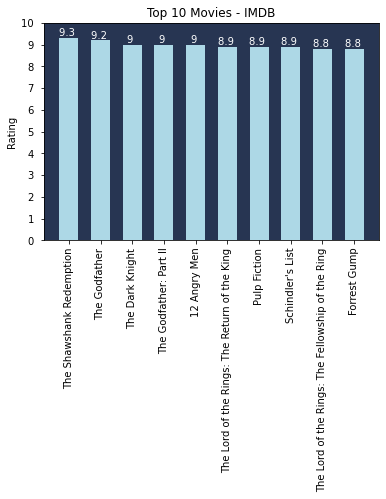

In [275]:
creating_barplot(df1,"series_title","imdb_rating","Top 10 Movies - IMDB","a","Rating")
plt.yticks(np.arange(0, 11, 1))
plt.ylim(0,10,1)


In [269]:
df1 = df.groupby(by=["director"]).size().sort_values(ascending=False).reset_index(name='size').head(10)

In [270]:
df1.head(10)


,director,size
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
5,Stanley Kubrick,9
6,Woody Allen,9
7,Billy Wilder,9
8,Quentin Tarantino,8
9,Christopher Nolan,8


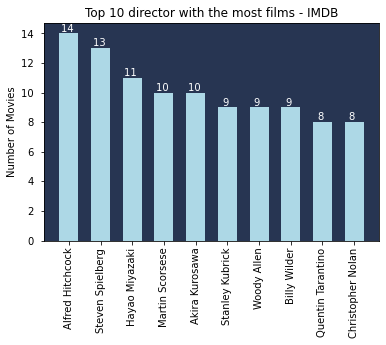

In [271]:
creating_barplot(df1,"director","size","Top 10 director with the most films - IMDB","a","Number of Movies")


In [122]:
star1 = df["star1"].append(df["star2"])
star1 = star1.append(df["star3"])
star1 = star1.append(df["star4"]).reset_index(name='actors')
star1.head(10)

,index,actors
0,0,Tim Robbins
1,1,Marlon Brando
2,2,Christian Bale
3,3,Al Pacino
4,4,Henry Fonda
5,5,Elijah Wood
6,6,John Travolta
7,7,Liam Neeson
8,8,Leonardo DiCaprio
9,9,Brad Pitt


In [267]:
df1 = star1.groupby("actors").size().sort_values(ascending=False).reset_index(name='size').head(10)
df1.head(10)

,actors,size
0,Robert De Niro,17
1,Tom Hanks,14
2,Al Pacino,13
3,Brad Pitt,12
4,Clint Eastwood,12
5,Matt Damon,11
6,Leonardo DiCaprio,11
7,Christian Bale,11
8,James Stewart,10
9,Humphrey Bogart,9


<BarContainer object of 10 artists>

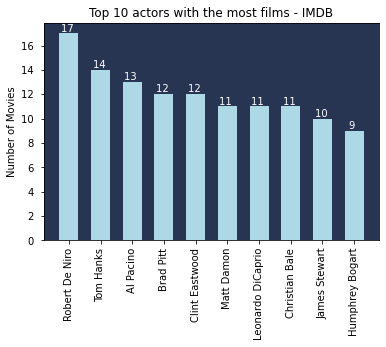

In [268]:
creating_barplot(df1,"actors","size","Top 10 actors with the most films - IMDB","a","Number of Movies")
plt.bar(df1["actors"],df1["size"],width=0.6,align='center',color=("#ADD8E6"))

In [193]:
df.head()

,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,The Shawshank Redemption,1994-01-01,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972-01-01,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008-01-01,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974-01-01,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957-01-01,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [124]:
years = df.groupby(by=["released_year"]).size().reset_index(name='size').set_index("released_year")
years.sort_values(by="size",ascending=False).head(20)

,size
released_year,
2014-01-01,32
2004-01-01,31
2009-01-01,29
2016-01-01,28
2013-01-01,28
2001-01-01,27
2006-01-01,26
2007-01-01,26
2015-01-01,25


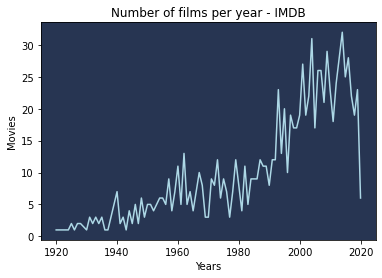

In [219]:
plt.plot(years.index,years["size"],color='#ADD8E6')
plt.title("Number of films per year - IMDB")
plt.xlabel("Years")
plt.ylabel("Movies")
ax = plt.gca()
ax.set_facecolor("#273552")

In [126]:
df.head()

,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,The Shawshank Redemption,1994-01-01,142.0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972-01-01,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008-01-01,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974-01-01,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957-01-01,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [265]:
listGenre = list(' '.join(df["genre"].tolist()).replace(",", " ").replace("  "," ").split(" "))
dfGenre = pd.DataFrame(data = listGenre, columns =["genre"])
df1 = dfGenre.groupby("genre").size().sort_values(ascending=False).reset_index(name='size').head(10)

<BarContainer object of 10 artists>

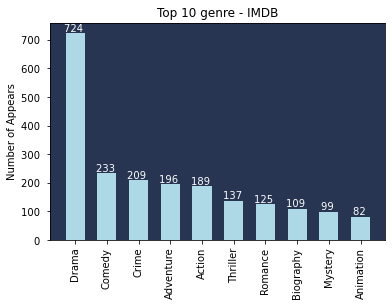

In [266]:
creating_barplot(df1,"genre","size","Top 10 genre - IMDB","a","Number of Appears")
plt.bar(df1["genre"],df1["size"],width=0.6,align='center',color=("#ADD8E6"))


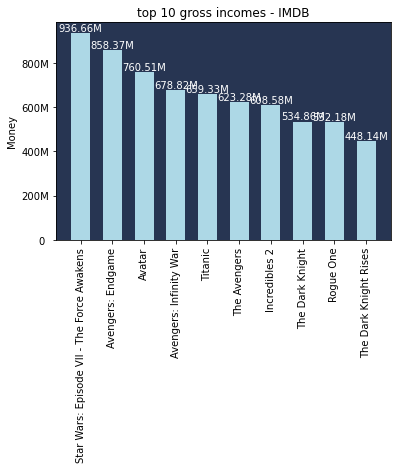

In [263]:
df1 = df.sort_values("gross", ascending = False).head(10)
creating_barplot(df1,"series_title","gross","top 10 gross incomes - IMDB","a","Money")



In [248]:
df1 = df.sort_values("runtime", ascending = False).head(10)
df1.head(10)

,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
140,Gangs of Wasseypur,2012-01-01,321.0,"Action, Comedy, Crime",8.2,89.00000,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia,82365,6.803475e+07
812,Hamlet,1996-01-01,242.0,Drama,7.7,77.97153,Kenneth Branagh,Kenneth Branagh,Julie Christie,Derek Jacobi,Kate Winslet,35991,4.414535e+06
314,Gone with the Wind,1939-01-01,238.0,"Drama, History, Romance",8.1,97.00000,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,1.986765e+08
71,Once Upon a Time in America,1984-01-01,229.0,"Crime, Drama",8.4,77.97153,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,5.321508e+06
116,Lawrence of Arabia,1962-01-01,228.0,"Adventure, Biography, Drama",8.3,100.00000,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,4.482414e+07
247,Lagaan: Once Upon a Time in India,2001-01-01,224.0,"Adventure, Drama, Musical",8.1,84.00000,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh,Rachel Shelley,105036,7.014700e+04
552,The Ten Commandments,1956-01-01,220.0,"Adventure, Drama",7.9,77.97153,Cecil B. DeMille,Charlton Heston,Yul Brynner,Anne Baxter,Edward G. Robinson,63560,9.374000e+07
300,Ben-Hur,1959-01-01,212.0,"Adventure, Drama, History",8.1,90.00000,William Wyler,Charlton Heston,Jack Hawkins,Stephen Boyd,Haya Harareet,219466,7.470000e+07
156,"Swades: We, the People",2004-01-01,210.0,Drama,8.2,77.97153,Ashutosh Gowariker,Shah Rukh Khan,Gayatri Joshi,Kishori Ballal,Smit Sheth,83005,1.223240e+06
484,The Irishman,2019-01-01,209.0,"Biography, Crime, Drama",7.9,94.00000,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,7.000000e+06


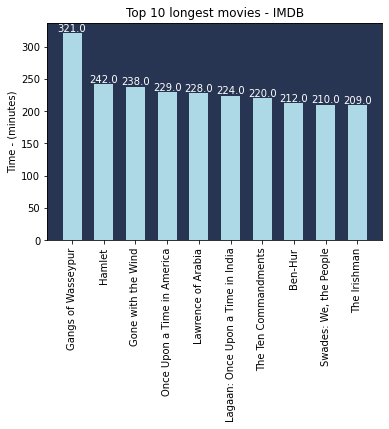

In [250]:
creating_barplot(df1,"series_title","runtime","Top 10 longest movies - IMDB","a","Time - (minutes)")

In [239]:
df1 = df.sort_values("meta_score", ascending=False).head(10)
df1.head(10)

,series_title,released_year,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
491,Boyhood,2014-01-01,165.0,Drama,7.9,100.0,Richard Linklater,Ellar Coltrane,Patricia Arquette,Ethan Hawke,Elijah Smith,335533,2.537998e+07
116,Lawrence of Arabia,1962-01-01,228.0,"Adventure, Biography, Drama",8.3,100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,4.482414e+07
81,Rear Window,1954-01-01,112.0,"Mystery, Thriller",8.4,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,3.676431e+07
274,Fanny och Alexander,1982-01-01,188.0,Drama,8.1,100.0,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,57784,4.971340e+06
440,Sweet Smell of Success,1957-01-01,96.0,"Drama, Film-Noir",8.0,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,28137,6.803475e+07
423,Il conformista,1970-01-01,113.0,Drama,8.0,100.0,Bernardo Bertolucci,Jean-Louis Trintignant,Stefania Sandrelli,Gastone Moschin,Enzo Tarascio,27067,5.419400e+05
260,Trois couleurs: Rouge,1994-01-01,99.0,"Drama, Mystery, Romance",8.1,100.0,Krzysztof Kieslowski,Irène Jacob,Jean-Louis Trintignant,Frédérique Feder,Jean-Pierre Lorit,90729,4.043686e+06
1,The Godfather,1972-01-01,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1.349664e+08
559,Notorious,1946-01-01,102.0,"Drama, Film-Noir, Romance",7.9,100.0,Alfred Hitchcock,Cary Grant,Ingrid Bergman,Claude Rains,Louis Calhern,92306,1.046400e+07
50,Casablanca,1942-01-01,102.0,"Drama, Romance, War",8.5,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,1.024560e+06


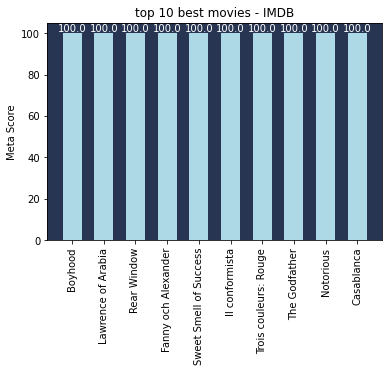

In [247]:
creating_barplot(df1,"series_title","meta_score","top 10 best movies - IMDB","a","Meta Score")
